In [1]:
import math
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
import numpy as np
import collections
import os

sample1_30.0us.csv


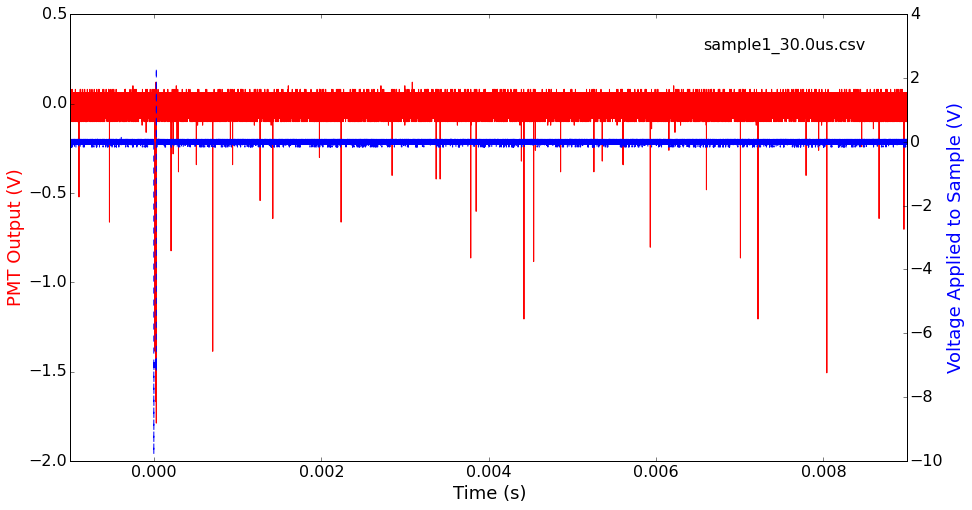

sample1_300.0us.csv


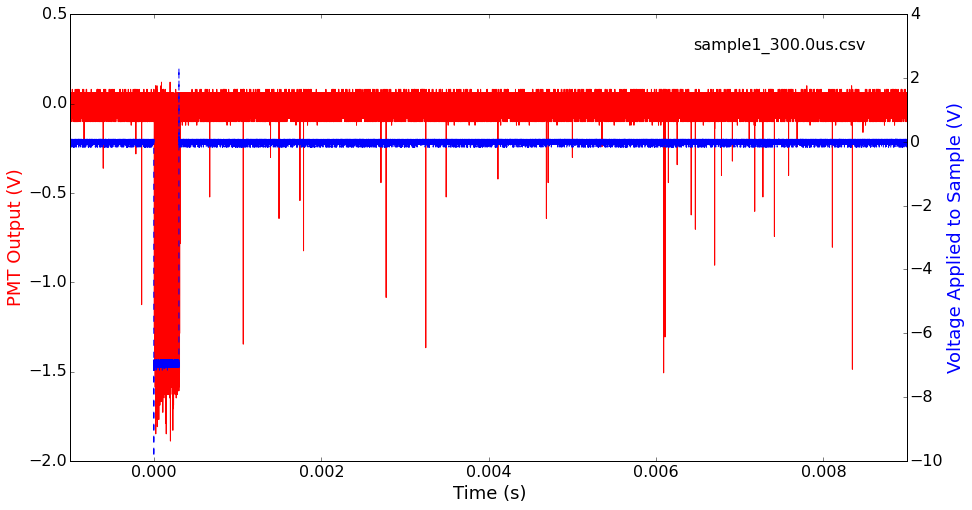

sample1_900.0us.csv


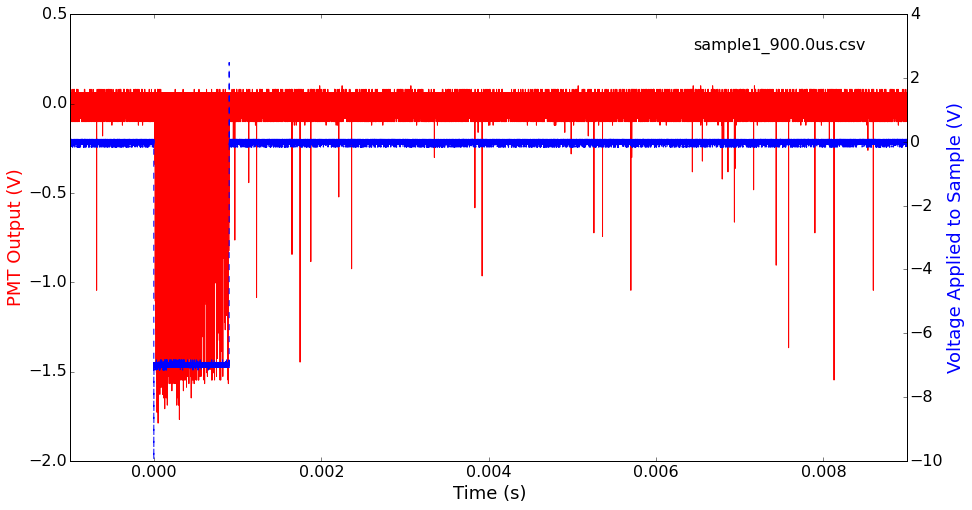

sample1_500.0us.csv


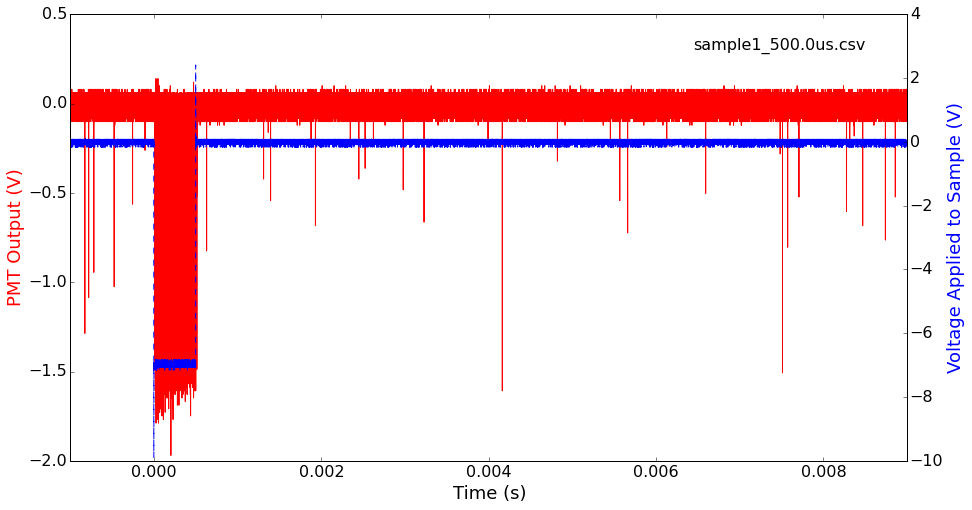

sample1_100.0us.csv


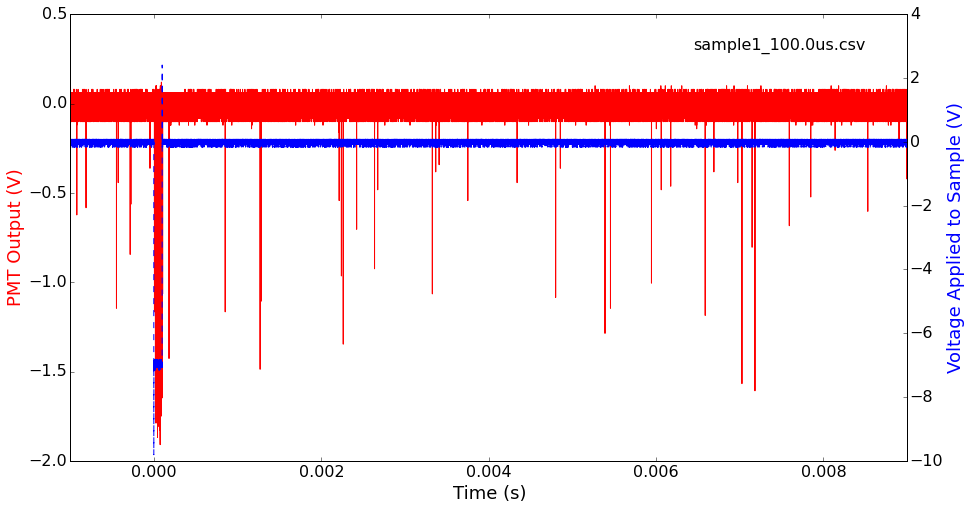

sample1_400.0us.csv


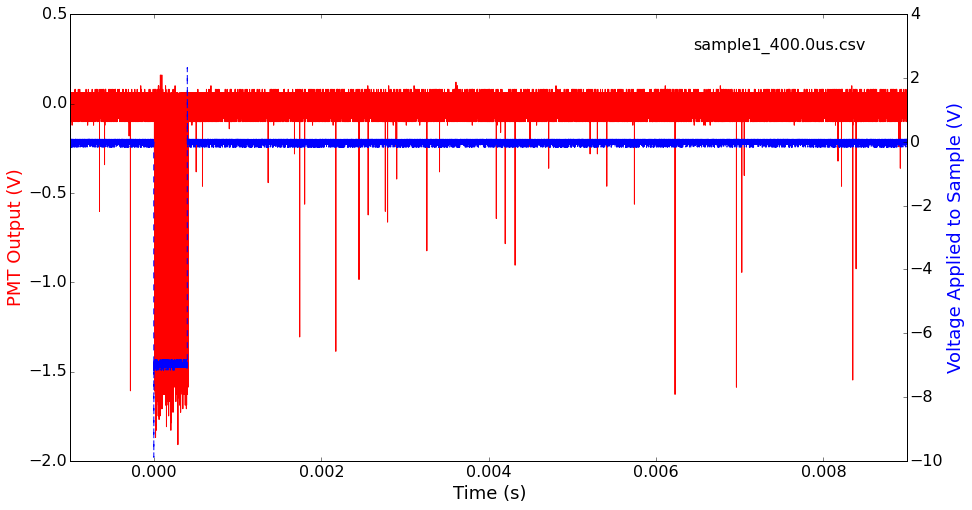

sample1_600.0us.csv


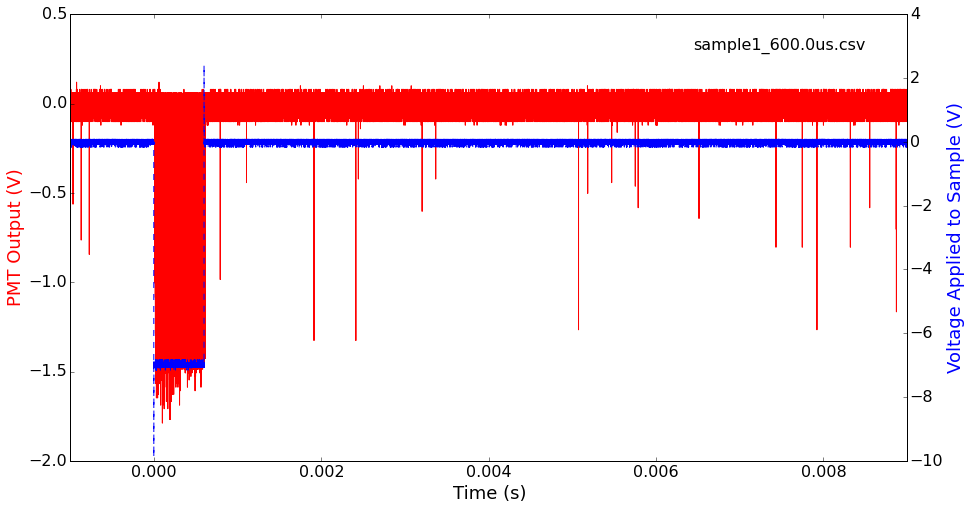

sample1_700.0us.csv


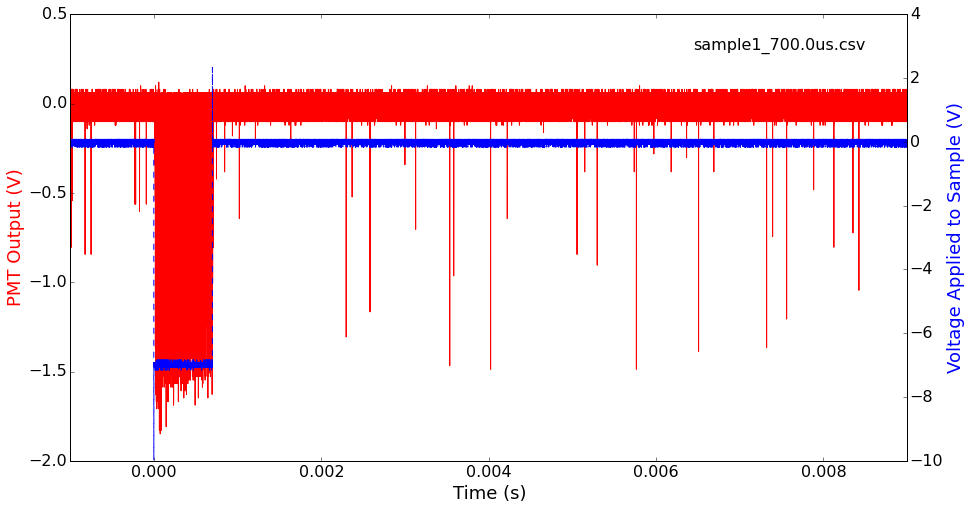

sample1_10.0us.csv


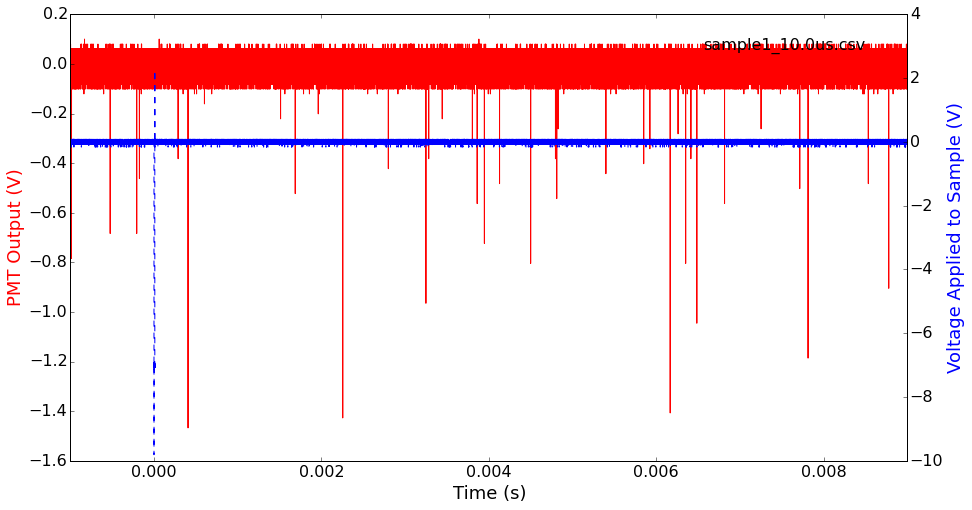

sample1_200.0us.csv


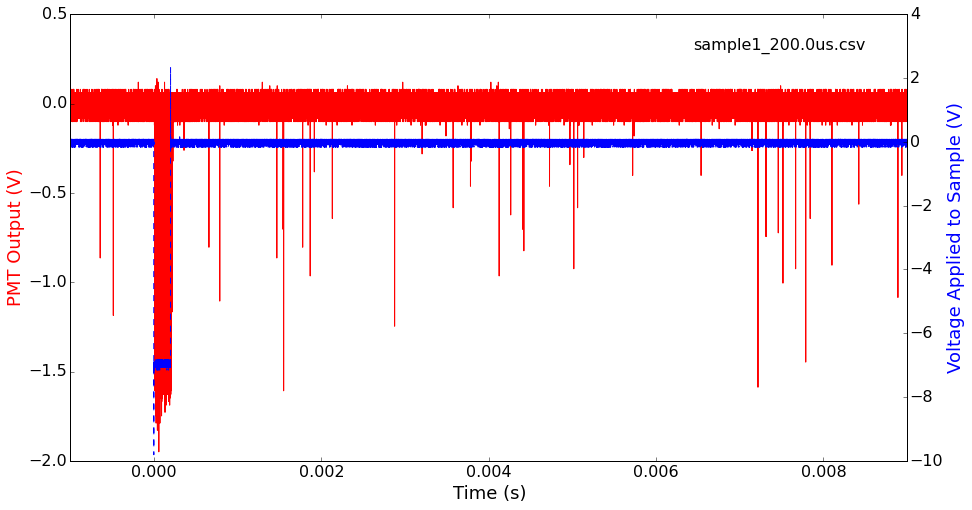

sample1_1000.0us.csv


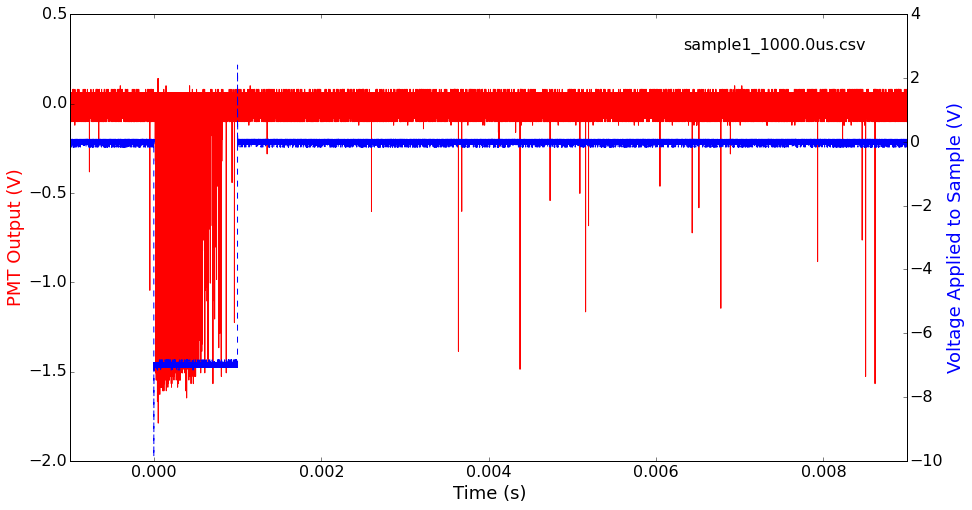

sample1_800.0us.csv


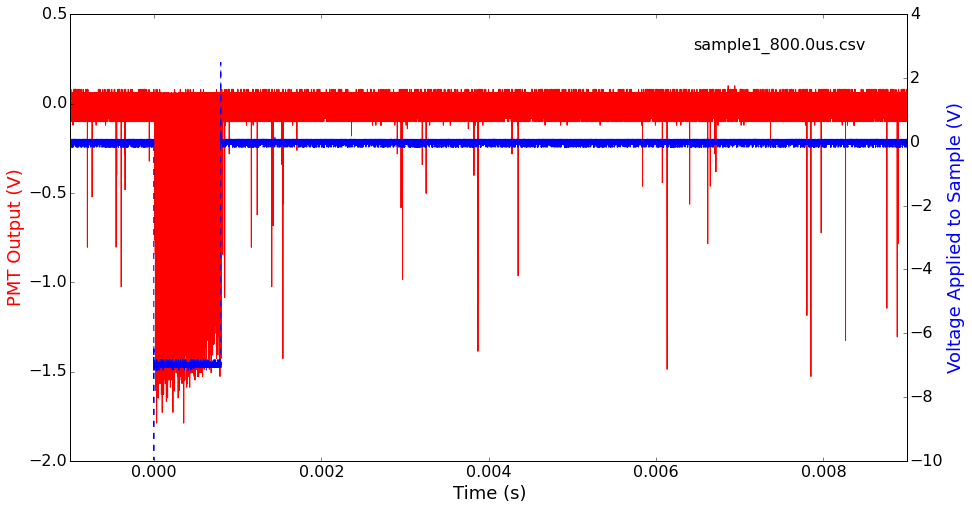

In [6]:
for file in os.listdir("."):
    if file.endswith(".csv"):
        print(file)
        data = np.loadtxt(file, delimiter=',')

        xData = data[:, 0]
        yChan0 = data[:, 2]
        yChan1 = data[:, 1]

        #--------------- Plot ---------------#
        fig, ax0 = plt.subplots(figsize=(15, 8))
        ax1 = ax0.twinx()
        ax0.plot( xData, yChan0, 'r-')
        ax1.plot( xData, yChan1, 'b--')
        ax0.set_xlim(-0.001, 0.009)
        #ax0.set_title(str(VoutFreq.value) + " Hz", fontsize=18)
        ax0.set_xlabel('Time (s)', fontsize=18)
        ax0.set_ylabel('PMT Output (V)', color='r', fontsize=18)
        ax0.tick_params(axis='x', labelsize=16)
        ax0.tick_params(axis='y', labelsize=16)
        #ax0.text(1, 1, str(VoutFreq.value) + " Hz\n" + str(Nperiods.value) + " T", ha='right', va='top')
        #ax0.spines['left'].set_color('red')
        ax1.set_ylabel('Voltage Applied to Sample (V)', color='b', fontsize=18)
        ax1.tick_params(axis='y', labelsize=16)
        #ax1.spines['right'].set_color('blue')

        ax0.text(0.95, 0.95, file,
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax0.transAxes, fontsize=16)

        plt.savefig(file[:-4] + '.png', bbox_inches='tight') #save figure, bbox_inches=tight:save all content in figure
        plt.show()

In [7]:
len(xData)

999999

In [3]:
pulseLength_ms = np.array([0.01, 0.03, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### Renaming

In [4]:
list = []
for file in os.listdir("."):
    if file.startswith("2015"):
        list.append(file)
list.sort()

for name in list:
    os.rename(name, 'sample1_'+str(pulseLength_ms[list.index(name)]*1000)+'us.csv')
    

In [8]:
list0 = []
list1 = []
list2 = []
for file in os.listdir("."):
    if file.endswith(".csv"):
        if float(file[8:-6]) < 100:
            list0.append(file)
        elif float(file[8:-6]) < 1000:
            list1.append(file)
        else:
            list2.append(file)
            
list0.sort()
list1.sort()
list2.sort()
list = list0 + list1 + list2
list

['sample1_10.0us.csv',
 'sample1_30.0us.csv',
 'sample1_100.0us.csv',
 'sample1_200.0us.csv',
 'sample1_300.0us.csv',
 'sample1_400.0us.csv',
 'sample1_500.0us.csv',
 'sample1_600.0us.csv',
 'sample1_700.0us.csv',
 'sample1_800.0us.csv',
 'sample1_900.0us.csv',
 'sample1_1000.0us.csv']

In [9]:
totLight = np.zeros(len(list))
for file in list:
    
    data = np.loadtxt(file, delimiter=',')
    
    totDark = 0
    for i in xrange(100000):
        totDark = totDark + data[i, 2]
    aveDark = totDark /100000
    print file[:-4] + '\t' + str(aveDark)
    
    Light = 0
    for i in xrange(int(float(file[8:12])*100)-1):
        Light = Light + data[100000+i, 2]
    totLight[list.index(file)] = Light - aveDark * (int(float(file[8:12])*100)-1)

sample1_10.0us	-0.00958236743
sample1_30.0us	-0.01020166916
sample1_100.0us	-0.00897633062
sample1_200.0us	-0.00796104946
sample1_300.0us	-0.00899844293
sample1_400.0us	-0.00862255978
sample1_500.0us	-0.00805391358
sample1_600.0us	-0.00656324844
sample1_700.0us	-0.00819300722
sample1_800.0us	-0.00880888953
sample1_900.0us	-0.00784265559
sample1_1000.0us	-0.00761471289


In [10]:
totLight

array([ -1.94486194e+00,  -1.93485776e+02,  -1.46962300e+03,
        -2.40567264e+03,  -3.65870095e+03,  -4.65886776e+03,
        -5.23353702e+03,  -5.89349195e+03,  -5.94640226e+03,
        -5.62308234e+03,  -4.56263711e+03,  -3.56947723e+03])

In [12]:
allSpikes = np.zeros(len(list))

for i in range(len(list)):
    data = np.loadtxt(list[i], delimiter=',')

    for spike in data[:, 2]:
        if spike <= -0.1:
            allSpikes[i] = allSpikes[i] + spike

In [13]:
allSpikes

array([ -216.783027,  -408.180045, -1706.6518  , -2499.375342,
       -3622.369987, -4472.761721, -4893.2641  , -5454.650815,
       -5519.133083, -5173.60541 , -4129.806904, -3199.475554])

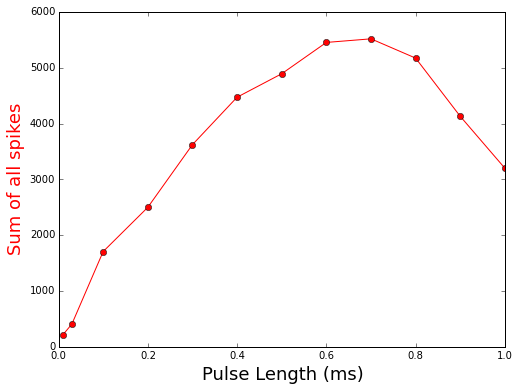

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(pulseLength_ms, -allSpikes, 'ro-')

#ax.set_xlim(0, 9)
#ax0.set_title(str(VoutFreq.value) + " Hz", fontsize=18)
ax.set_xlabel('Pulse Length (ms)', fontsize=18)
ax.set_ylabel('Sum of all spikes', color='r', fontsize=18)

plt.savefig('Integrated_Spikes.png')
plt.show()

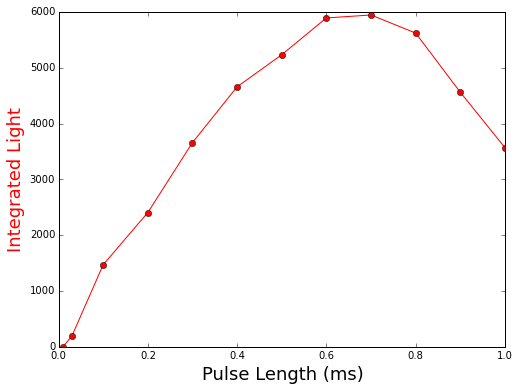

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(pulseLength_ms, -totLight, 'ro-')

#ax.set_xlim(0, 9)
#ax0.set_title(str(VoutFreq.value) + " Hz", fontsize=18)
ax.set_xlabel('Pulse Length (ms)', fontsize=18)
ax.set_ylabel('Integrated Light', color='r', fontsize=18)

plt.savefig('Integrated_Light.png', bbox_inches='tight')
plt.show()

In [49]:
from collections import Counter

In [50]:
Counter(totLight)

Counter({-1497.0162963106959: 1, -570.59989837348439: 1, -421.83666164687202: 1, -306.07015879397738: 1, -395.37595202943703: 1, -485.03049281939821: 1, -877.57638234836486: 1, -848.9728644303168: 1, -579.01954065419477: 1, -383.66070951109123: 1, -875.54611951812331: 1, -235.65189911365445: 1, -501.91205148951303: 1, -1513.6217938172667: 1, -380.11532065421284: 1, -421.89393041497738: 1, -167.51544224439311: 1, -787.18003612505618: 1})